In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt

import os
import math
import random
import shutil

# To Create a Directory and Move images from 1 folder to 2nd folder

In [2]:
BASE_DIR = r'C:\Users\SONY\Desktop\Machine Learning\Tensorflow\lego\star-wars'
names = ["YODA", "LUKE SKYWALKER", "R2-D2", "MACE WINDU", "GENERAL GRIEVOUS"]

# tf.random.set_seed(1)

In [3]:
if not os.path.isdir(BASE_DIR + "\\train"):
    for name in names:
        os.makedirs(BASE_DIR + "train\\" +name)
        os.makedirs(BASE_DIR + "test\\" + name)
        os.makedirs(BASE_DIR + "val\\" + name)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\SONY\\Desktop\\Machine Learning\\Tensorflow\\lego\\star-warstrain\\YODA'

In [ ]:
orig_folders = ["\\0001\\", "\\0002\\", "\\0003\\", "\\0004\\", "\\0005\\"]
for folder_idx, folder in enumerate(orig_folders):
    files = os.listdir(BASE_DIR + folder)
    number_of_images = len([name for name in files])
    n_train = int((number_of_images * 0.6) + 0.5)
    n_valid = int((number_of_images*0.25) + 0.5)
    n_test = number_of_images - n_train - n_valid
    print(number_of_images, n_train, n_valid, n_test)
    for idx, file in enumerate(files):
        file_name = BASE_DIR + folder + file
        if idx < n_train:
            shutil.move(file_name, BASE_DIR + "train\\" + names[folder_idx])
        elif idx < n_train + n_valid:
            shutil.move(file_name, BASE_DIR + "val\\" + names[folder_idx])
        else:
            shutil.move(file_name, BASE_DIR + "test\\" + names[folder_idx])

# Creating The Model And Pre Processing The Data And Data Augmentation


In [4]:
train_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255,)
#    horizontal_flip=True,
#    width_shift_range=0.2, height_shift_range=0.2,
#    shear_range=0.2, zoom_range=0.2)
val_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
train_batches = train_gen.flow_from_directory(
    r'C:\Users\SONY\Desktop\Machine Learning\Tensorflow\lego\star-warstrain',
    target_size=(256, 256),
    class_mode='sparse',
    batch_size=4,
    shuffle=True,
    color_mode="rgb",
    classes=names   
  

)

val_batches = val_gen.flow_from_directory(
    r'C:\Users\SONY\Desktop\Machine Learning\Tensorflow\lego\star-warsval',
    target_size=(256, 256),
    class_mode='sparse',
    batch_size=4,
    shuffle=False,
    color_mode="rgb",
    classes=names   
)
test_batches = test_gen.flow_from_directory(
    r'C:\Users\SONY\Desktop\Machine Learning\Tensorflow\lego\star-warstest',
    target_size=(256, 256),
    class_mode='sparse',
    batch_size=4,
    shuffle=False,
    color_mode="rgb",
    classes=names   
)

Found 37 images belonging to 5 classes.
Found 16 images belonging to 5 classes.
Found 10 images belonging to 5 classes.


In [5]:
train_batch = train_batches[0]
print(train_batch[0].shape)
print(train_batch[1])
test_batch = test_batches[0]
print(test_batch[0].shape)
print(test_batch[1])

(4, 256, 256, 3)
[1. 0. 3. 0.]
(4, 256, 256, 3)
[0. 0. 1. 1.]


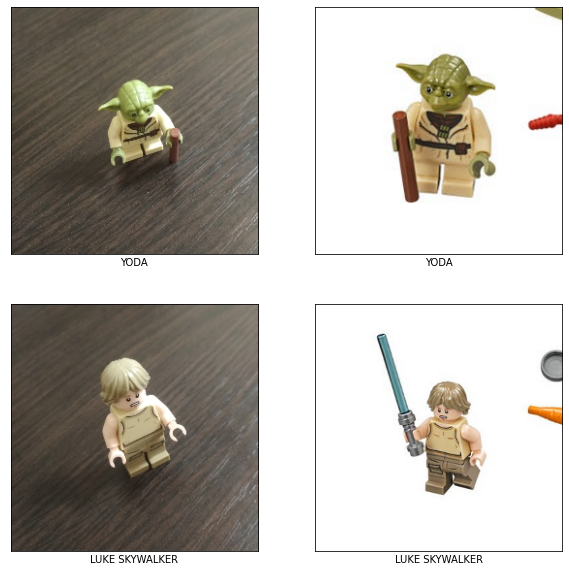

In [6]:
def show(batch, pred_labels=None):
    plt.figure(figsize=(10,10))
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(batch[0][i], cmap=plt.cm.binary)
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
        lbl = names[int(batch[1][i])]
        if pred_labels is not None:
            lbl += "/ Pred:" + names[int(pred_labels[i])]
        plt.xlabel(lbl)
    plt.show()

show(test_batch)

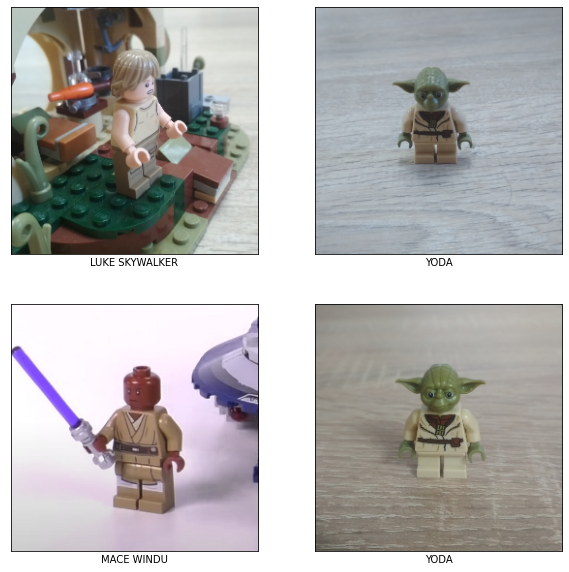

In [7]:
show(train_batch)

# Creating the Sequentional model 

In [16]:
data_aug  =  keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
    
])

In [31]:
model = keras.models.Sequential()
model.add(data_aug)
model.add(layers.Conv2D(32, (3,3), strides=(1,1), padding="valid", activation='relu', input_shape=(256, 256,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, 3, activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(500, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(50,))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(5))


# Optiminzing aand losses

In [32]:
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = keras.optimizers.Adam(lr=0.001)
metrics = ["accuracy"]

model.compile(optimizer=optim, loss=loss, metrics=metrics)

In [39]:

# training
epochs = 30

# callbacks
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    verbose=2
)

history = model.fit(train_batches, validation_data=val_batches,
                    callbacks=[early_stopping],
                      epochs=epochs, verbose=2)

Epoch 1/30
10/10 - 21s - loss: 1.4301 - accuracy: 0.4595 - val_loss: 1.3215 - val_accuracy: 0.5000
Epoch 2/30
10/10 - 20s - loss: 1.3872 - accuracy: 0.4324 - val_loss: 1.1956 - val_accuracy: 0.4375
Epoch 3/30
10/10 - 20s - loss: 1.6845 - accuracy: 0.2973 - val_loss: 1.3246 - val_accuracy: 0.5625
Epoch 4/30
10/10 - 20s - loss: 1.5246 - accuracy: 0.3784 - val_loss: 1.2936 - val_accuracy: 0.4375
Epoch 5/30
10/10 - 20s - loss: 1.1934 - accuracy: 0.6486 - val_loss: 1.1158 - val_accuracy: 0.5625
Epoch 6/30
10/10 - 20s - loss: 1.2809 - accuracy: 0.5405 - val_loss: 1.3215 - val_accuracy: 0.5625
Epoch 7/30
10/10 - 20s - loss: 1.1769 - accuracy: 0.5676 - val_loss: 1.0782 - val_accuracy: 0.5625
Epoch 8/30
10/10 - 20s - loss: 1.1440 - accuracy: 0.5405 - val_loss: 1.2188 - val_accuracy: 0.3750
Epoch 9/30
10/10 - 20s - loss: 1.1405 - accuracy: 0.5946 - val_loss: 1.4332 - val_accuracy: 0.4375
Epoch 10/30
10/10 - 20s - loss: 1.2021 - accuracy: 0.5405 - val_loss: 1.1373 - val_accuracy: 0.5625
Epoch 11/

In [48]:
model.save('lego_model.h5')

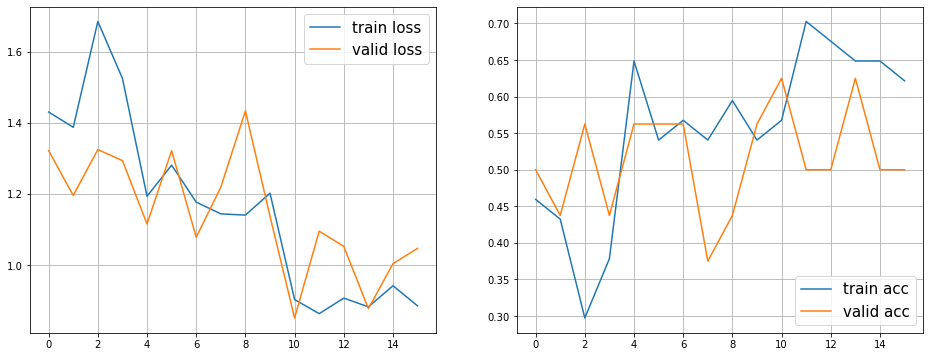

In [40]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='valid loss')
plt.grid()
plt.legend(fontsize=15)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='valid acc')
plt.grid()
plt.legend(fontsize=15);

In [41]:
model.evaluate(test_batches, verbose=2)

3/3 - 1s - loss: 0.8163 - accuracy: 0.7000


[0.8163113594055176, 0.699999988079071]

In [44]:
predictions = model.predict(test_batches)
predictions = tf.nn.softmax(predictions)
labels = np.argmax(predictions, axis=1)

print(test_batches[0][1])
print(labels[0:4])

[0. 0. 1. 1.]
[0 2 2 2]


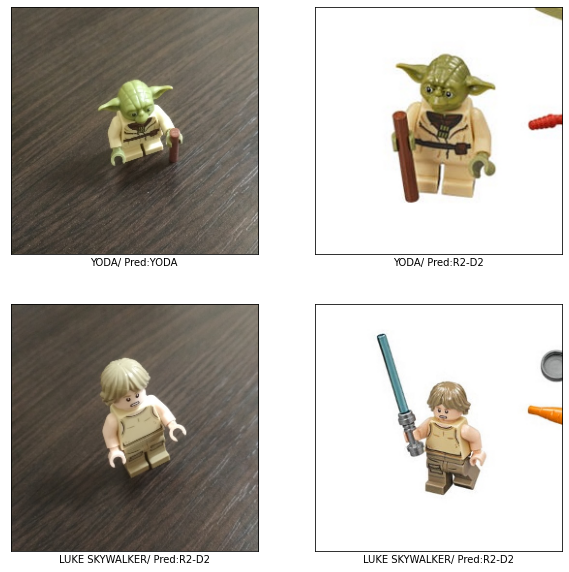

In [45]:

show(test_batches[0], labels[0:4])

In [ ]:
np.max(weights[0])

In [ ]:

weights = model.get_weights()

In [ ]:
np.max(weights[1])

In [26]:

reg_history = reg_model.fit(train_batches, validation_data=val_batches,
                    callbacks=[early_stopping],
                      epochs=epochs, verbose=2)

Epoch 1/5


InvalidArgumentError:  Received a label value of 4 which is outside the valid range of [0, 1).  Label values: 3 1 4 3
	 [[node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits (defined at <ipython-input-26-67bb4c8e602f>:1) ]] [Op:__inference_train_function_2444]

Function call stack:
train_function


In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
reg_weights = reg_model.get_weights()

In [ ]:

np.max(reg_weights[0])

In [ ]:
np.max(reg_weights[1])

In [29]:
predictions =reg_model.predict(test_batches)
predictions = tf.nn.softmax(predictions)
labels = np.argmax(predictions, axis=1)

print(test_batches[0][1])
print(labels[0:4])


NameError: name 'reg_model' is not defined

In [ ]:
show(test_batches[0], labels[0:4])